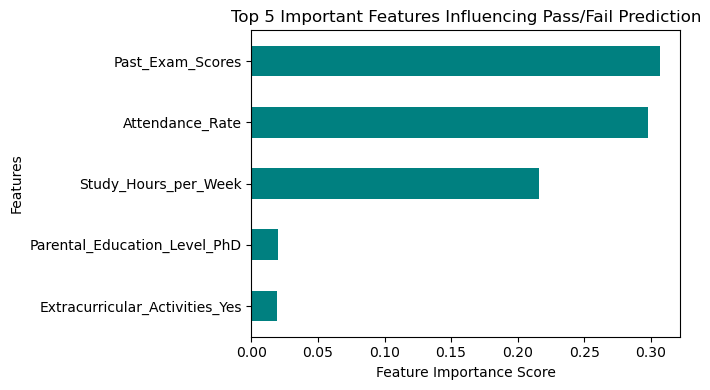

In [ ]:
# file name: 4.8_model_explainability.py
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ----------------------------------------------------------------------------------------------

# Load the dataset
student_df = pd.read_csv("../../../data/raw/student_performance_dataset.csv")

# ----------------------------------------------------------------------------------------------
# Prepare data for classification
X = student_df.drop(columns=["Final_Exam_Score", "Pass_Fail", "Student_ID"])  # Features
y = student_df["Pass_Fail"].map({"Fail": 0, "Pass": 1})  # Binary target variable

# Identify categorical and numerical columns
categorical_cols = [
    "Gender",
    "Parental_Education_Level",
    "Internet_Access_at_Home",
    "Extracurricular_Activities",
]
numerical_cols = ["Study_Hours_per_Week", "Attendance_Rate", "Past_Exam_Scores"]

# ----------------------------------------------------------------------------------------------
# Preprocessing pipeline for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),  # Standardize numerical features
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_cols,
        ),  # One-hot encode categorical features
    ]
)

# ----------------------------------------------------------------------------------------------
# Build and train pipeline
clf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),  # Preprocess the data
        ("classifier", RandomForestClassifier(n_estimators=200, random_state=42)),
    ]
)

clf_pipeline.fit(X, y)

# ----------------------------------------------------------------------------------------------
# Extract feature importances
model = clf_pipeline.named_steps["classifier"] # Get the trained classifier
feature_names = numerical_cols + list(
    clf_pipeline.named_steps["preprocessor"] # Get the preprocessor
    .transformers_[1][1] # Access the OneHotEncoder
    .get_feature_names_out(categorical_cols)
)  # Combine numerical and one-hot encoded feature names
importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(
    ascending=True
)  # Sort importances ascending order

# Save to Excel file
importances.to_excel("4.8_feature_importance.xlsx")
# Plot top 5 important features
plt.figure(figsize=(7, 4))
importances.tail(5).plot(kind="barh", color="teal")
plt.title("Top 5 Important Features Influencing Pass/Fail Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("../../visualization/4.8_feature_importance.png", dpi=300)
plt.show()
plt.close()